# Data

## SRBC Historical Dataset
Load SRBC Dataset (360 CSV Files provisioned by SRBC Leadership Team)

In [1]:
import os
import pandas as pd

# Load, Merge, Create Pivoted Table for SRBC Historical Dataset (360 CSV Files)

# Path to the folder containing the CSV files
folder_path = r"C:\Users\mhriv\OneDrive\Desktop\Susquehanna River Basin Commission\PhD Dissertation\Water_Quality_Data\Data"

# List all files in the current directory (which includes the attachments in Datalore)
all_files = os.listdir()

# Filter to get only CSV files
csv_files = [file for file in all_files if file.endswith(".csv")]

# Create an empty DataFrame to store the merged data
merged_data = pd.DataFrame(columns=['Station_ID', 'Timestamp (UTC-05:00)', 'Parameter', 'File_Name', 'Value'])

# Iterate over each CSV file
for file in csv_files:
    # Extract the station ID and parameter from the file name
    station_id, parameter = os.path.splitext(file)[0].split('_')  # Assumes the file names have the format "station_id_parameter.csv"

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Add the station ID as a new column in the DataFrame
    df['Station_ID'] = station_id

    # Add the parameter as a new column in the DataFrame
    df['Parameter'] = parameter

    # Add the file name as a new column in the DataFrame
    df['File_Name'] = file

    # Merge the current file's data with the merged_data DataFrame
    merged_data = pd.concat([merged_data, df])

# Reset the index of the merged data
merged_data.reset_index(drop=True, inplace=True)
merged_data

,Station_ID,Timestamp (UTC-05:00),Parameter,File_Name,Value
0,29,6/2/2010 0:00,pH,29_pH.csv,6.987914
1,29,6/3/2010 0:00,pH,29_pH.csv,6.981269
2,29,6/4/2010 0:00,pH,29_pH.csv,6.975609
3,29,6/5/2010 0:00,pH,29_pH.csv,6.958803
4,29,6/6/2010 0:00,pH,29_pH.csv,7.157205
...,...,...,...,...,...
881237,50,12/27/2019 0:00,Turb,50_Turb.csv,10.413802
881238,50,12/28/2019 0:00,Turb,50_Turb.csv,15.043802
881239,50,12/29/2019 0:00,Turb,50_Turb.csv,17.341615
881240,50,12/30/2019 0:00,Turb,50_Turb.csv,39.579427


In [6]:
# Pivot the Parameter column into separate columns
pivoted_data = merged_data.pivot(index=['Station_ID', 'Timestamp (UTC-05:00)'], columns='Parameter', values='Value').reset_index()
pivoted_data

Parameter,Station_ID,Timestamp (UTC-05:00),DO,SpCond,Turb,WTemp,pH
0,10,1/1/2014 0:00,14.635608,185.890624,11.605556,-0.079514,7.622604
1,10,1/1/2015 0:00,15.561054,250.434025,4.888889,-0.034358,8.005035
2,10,1/1/2016 0:00,13.185156,226.660523,2.476562,3.615208,7.783958
3,10,1/10/2015 0:00,15.516694,280.032984,3.721181,-0.030000,7.844896
4,10,1/10/2016 0:00,13.861944,184.426767,118.013542,0.476927,7.415156
...,...,...,...,...,...,...,...
183840,99,9/9/2014 0:00,9.999167,58.749999,2.897500,13.120000,7.144167
183841,99,9/9/2015 0:00,8.460833,92.333333,2.208290,18.766667,7.370942
183842,99,9/9/2016 0:00,8.342708,97.214188,4.793229,19.227604,6.913586
183843,99,9/9/2018 0:00,10.352448,59.989583,2.477917,12.068333,6.183111


## Data Pre-Processing
- Extract Date/Time from the column 'Timestamp (UTC-05:00)'
- Remove Time column since it does not have time

In [7]:
# Use errors='coerce' to handle errors
pivoted_data['Date'] = pd.to_datetime(pivoted_data['Timestamp (UTC-05:00)'], errors='coerce').dt.date
pivoted_data['Time'] = pd.to_datetime(pivoted_data['Timestamp (UTC-05:00)'], errors='coerce').dt.time

# Drop the original 'Timestamp (UTC-05:00)' column
pivoted_data = pivoted_data.drop(['Timestamp (UTC-05:00)'], axis=1)

pivoted_data = pivoted_data[['Station_ID','Date','DO', 'SpCond','Turb','WTemp','pH']]
pivoted_data

Parameter,Station_ID,Date,DO,SpCond,Turb,WTemp,pH
0,10,2014-01-01,14.635608,185.890624,11.605556,-0.079514,7.622604
1,10,2015-01-01,15.561054,250.434025,4.888889,-0.034358,8.005035
2,10,2016-01-01,13.185156,226.660523,2.476562,3.615208,7.783958
3,10,2015-01-10,15.516694,280.032984,3.721181,-0.030000,7.844896
4,10,2016-01-10,13.861944,184.426767,118.013542,0.476927,7.415156
...,...,...,...,...,...,...,...
183840,99,2014-09-09,9.999167,58.749999,2.897500,13.120000,7.144167
183841,99,2015-09-09,8.460833,92.333333,2.208290,18.766667,7.370942
183842,99,2016-09-09,8.342708,97.214188,4.793229,19.227604,6.913586
183843,99,2018-09-09,10.352448,59.989583,2.477917,12.068333,6.183111


In [8]:
# Count the Number of Station_ID that will be considered in the Machine Learning Model
pivoted_data.Station_ID.value_counts()

2 3513
5 3482
39 3412
19 3398
43 3379
 ... 
58 792
109 785
110 615
23 440
25 436
Name: Station_ID, Length: 72, dtype: int64

In [9]:
# Drop the original 'Timestamp (UTC-05:00)' column
pivoted_data = pivoted_data.drop(['Station_ID','Date'], axis=1)
pivoted_data

Parameter,DO,SpCond,Turb,WTemp,pH
0,14.635608,185.890624,11.605556,-0.079514,7.622604
1,15.561054,250.434025,4.888889,-0.034358,8.005035
2,13.185156,226.660523,2.476562,3.615208,7.783958
3,15.516694,280.032984,3.721181,-0.030000,7.844896
4,13.861944,184.426767,118.013542,0.476927,7.415156
...,...,...,...,...,...
183840,9.999167,58.749999,2.897500,13.120000,7.144167
183841,8.460833,92.333333,2.208290,18.766667,7.370942
183842,8.342708,97.214188,4.793229,19.227604,6.913586
183843,10.352448,59.989583,2.477917,12.068333,6.183111


- Apply Inter-Quartile Range & Remove Outliers
- According to the [United States Environmental Protection Agency (EPA)](https://archive.epa.gov/water/archive/web/html/vms59.html#:~:text=The%20conductivity%20of%20rivers%20in,150%20and%20500%20%C2%B5hos%2Fcm.), the conductivity of rivers in the United States generally ranges from *50 to 1500 µmhos/cm*. In addition, the studies of inland fresh waters indicate that streams supporting good mixed fisheries have a range between *150 and 500 µhos/cm.*

In [10]:
#Remove date and site , Find inter quartile range, Remove outlier outside that range
pivoted_data=pivoted_data[['DO', 'pH', 'Turb', 'SpCond', 'WTemp']]
Q1 = pivoted_data.quantile(0.25)
Q3= pivoted_data.quantile(0.75)
IQR = Q3 - Q1
pivoted_data = pivoted_data[~((pivoted_data < (Q1 - 1.5 * IQR)) |(pivoted_data > (Q3 + 1.5 * IQR))).any(axis=1)]
pivoted_data

#remove negative data observations for SpCond and set range starting from 50 µmhos/cm
pivoted_data = pivoted_data[pivoted_data['SpCond'] >= 50]
pivoted_data

Parameter,DO,pH,Turb,SpCond,WTemp
0,14.635608,7.622604,11.605556,185.890624,-0.079514
1,15.561054,8.005035,4.888889,250.434025,-0.034358
2,13.185156,7.783958,2.476562,226.660523,3.615208
3,15.516694,7.844896,3.721181,280.032984,-0.030000
5,15.554573,7.778802,3.773611,279.597226,-0.030000
...,...,...,...,...,...
183840,9.999167,7.144167,2.897500,58.749999,13.120000
183841,8.460833,7.370942,2.208290,92.333333,18.766667
183842,8.342708,6.913586,4.793229,97.214188,19.227604
183843,10.352448,6.183111,2.477917,59.989583,12.068333


## Feature Engineering

### **Ratio of Turbidity and Specific Conductance**

*  According to [EPA](https://www.epa.gov/national-aquatic-resource-surveys/indicators-conductivity), Conductivity is a measure of the ability of water to pass an electrical current. Since the dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases.
* According to [USGS](https://www.usgs.gov/special-topics/water-science-school/science/turbidity-and-water) Turbidity is the measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms.

* Assessing the ratio between Turbidity and Specific Conductance support evaluating the impact of the water to conduct electricity

In [11]:
import numpy as np
# Create the new feature
pivoted_data['Turb_to_SpCond'] = pivoted_data['Turb'] / pivoted_data['SpCond']

# Replace any infinities that could have been created by division by zero
pivoted_data['Turb_to_SpCond'].replace([np.inf, -np.inf], np.nan, inplace=True)
pivoted_data

Parameter,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288
5,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497
...,...,...,...,...,...,...
183840,9.999167,7.144167,2.897500,58.749999,13.120000,0.049319
183841,8.460833,7.370942,2.208290,92.333333,18.766667,0.023916
183842,8.342708,6.913586,4.793229,97.214188,19.227604,0.049306
183843,10.352448,6.183111,2.477917,59.989583,12.068333,0.041306


### **Ratio between Dissolved Oxygen and Specific Conductance**

*  The water quality parameter of Dissolved Oxygen (DO) present an inverse relationship with the target variable Specific Conductance (SpCond)

* [Adina et al. (2016)](https://www.researchgate.net/publication/329574331_EVALUATION_OF_THE_ANTHROPOGENIC_IMPACT_ON_THE_WATER_QUALITY_OF_DAMBOVITA_RIVER) illustrates the correlation of both DO and SpCond highlighting its inverse proportionality due to the increase of Dissolved Oxygen that takes place when polluting substances that causes turbidity are eliminated from water.

* The ratio between Dissolved Oxygen and Specific Conductance may provide more insights of this inver relationship when Training Machine Learning Model

In [12]:
import numpy as np

# Create the new feature with inverse proportion
pivoted_data['DO_to_SpCond'] = pivoted_data['DO'] / pivoted_data['SpCond']

# Replace any infinities that could have been created by division by zero
pivoted_data['DO_to_SpCond'].replace([np.inf, -np.inf], np.nan, inplace=True)
pivoted_data

Parameter,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond,DO_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432,0.078732
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522,0.062136
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926,0.058171
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288,0.055410
5,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497,0.055632
...,...,...,...,...,...,...,...
183840,9.999167,7.144167,2.897500,58.749999,13.120000,0.049319,0.170199
183841,8.460833,7.370942,2.208290,92.333333,18.766667,0.023916,0.091634
183842,8.342708,6.913586,4.793229,97.214188,19.227604,0.049306,0.085818
183843,10.352448,6.183111,2.477917,59.989583,12.068333,0.041306,0.172571


### **Ratio between Water Temperature and Specific Conductance**

*  The water quality Water Temperature (WTemp) impacts the variable Specific Conductance (SpCond) with levels of water acidity

* According to the [United States Environmental Protection Agency (EPA)](https://archive.epa.gov/water/archive/web/html/vms59.html) Conductivity is affected by Water Temperature. For instance, the warmer the water, the higher the conductivity. For this reason, Conductivity is reported as Conductivity at 25 degrees Celsius (25 C)

* [Hong et al. (2021)](https://doi.org/10.3390/environments8010006) Conductivity of water (and by extension dissolved solids) is expected to increase with temperature. For each 1 °C increment, conductivity rises by 2–4%. Temperature influences conductivity by increasing ion mobility and dissolvability of many salts and minerals

In [13]:
import numpy as np
# Create the new feature
pivoted_data['WTemp_to_SpCond'] = pivoted_data['WTemp'] / pivoted_data['SpCond']

# Replace any infinities that could have been created by division by zero
pivoted_data['WTemp_to_SpCond'].replace([np.inf, -np.inf], np.nan, inplace=True)
pivoted_data

Parameter,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond,DO_to_SpCond,WTemp_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432,0.078732,-0.000428
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522,0.062136,-0.000137
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926,0.058171,0.015950
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288,0.055410,-0.000107
5,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497,0.055632,-0.000107
...,...,...,...,...,...,...,...,...
183840,9.999167,7.144167,2.897500,58.749999,13.120000,0.049319,0.170199,0.223319
183841,8.460833,7.370942,2.208290,92.333333,18.766667,0.023916,0.091634,0.203249
183842,8.342708,6.913586,4.793229,97.214188,19.227604,0.049306,0.085818,0.197786
183843,10.352448,6.183111,2.477917,59.989583,12.068333,0.041306,0.172571,0.201174


### **Ratio between pH and Specific Conductance**

* According to the [United States Environmental Protection Agency (EPA)](https://www.epa.gov/system/files/documents/2021-07/parameter-factsheet_ph.pdf) pH is an important water quality parameter and indicator of chemical, physical, and biological changes in a waterbody. It plays a critical role in chemical processes in natural waters.

* [Saalidong et al. (2022)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0262117) concluded the non-robustness of predictors in the surface water models were conspicuous.The authors state the relationship between water pH and other water quality parameters are different in different open water systems and can be influenced by the presence of other parameters. Therefore, the ratio of pH to SpCond allow reading underlying pattern of data.

In [14]:
import numpy as np
# Create the new feature
pivoted_data['pH_to_SpCond'] = pivoted_data['pH'] / pivoted_data['SpCond']

# Replace any infinities that could have been created by division by zero
pivoted_data['pH_to_SpCond'].replace([np.inf, -np.inf], np.nan, inplace=True)
pivoted_data

Parameter,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond,DO_to_SpCond,WTemp_to_SpCond,pH_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432,0.078732,-0.000428,0.041006
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522,0.062136,-0.000137,0.031965
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926,0.058171,0.015950,0.034342
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288,0.055410,-0.000107,0.028014
5,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497,0.055632,-0.000107,0.027821
...,...,...,...,...,...,...,...,...,...
183840,9.999167,7.144167,2.897500,58.749999,13.120000,0.049319,0.170199,0.223319,0.121603
183841,8.460833,7.370942,2.208290,92.333333,18.766667,0.023916,0.091634,0.203249,0.079830
183842,8.342708,6.913586,4.793229,97.214188,19.227604,0.049306,0.085818,0.197786,0.071117
183843,10.352448,6.183111,2.477917,59.989583,12.068333,0.041306,0.172571,0.201174,0.103070


## Data Imputation

* Apply Data Imputation technique to fill missing values using the method of Piecewise Multivariate Imputation
* [Chen et al (2023)](https://doi.org/10.1016/j.jhydrol.2022.128901) proposes Multivariate Imputation such as Piece-wise Imputation (PWIMP)
 * PWIMP divides the original dataset into a few sub-datasets based on the missing segments, and then each sub-dataset is filled in and combined to obtain a complete dataset.
 * PWIMP can reflect both of the uncertainty and temporal information of the original data.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the imputer
imp = IterativeImputer(max_iter=5, random_state=42)

# Define index cut-off for demonstration purposes
# You might have a more complex criteria based on your data
index_cut_off = len(pivoted_data) // 4

# Split the data into two segments
segment1 = pivoted_data.iloc[:index_cut_off, :]
segment2 = pivoted_data.iloc[index_cut_off:, :]

# Apply the imputer on each segment
segment1_imputed = imp.fit_transform(segment1)
segment2_imputed = imp.fit_transform(segment2)

# Convert imputed segments back to DataFrame
segment1_imputed = pd.DataFrame(segment1_imputed, columns=pivoted_data.columns, index=segment1.index)
segment2_imputed = pd.DataFrame(segment2_imputed, columns=pivoted_data.columns, index=segment2.index)

# Merge imputed segments
imputed_data = pd.concat([segment1_imputed, segment2_imputed])
pivoted_data = imputed_data
pivoted_data

/opt/python/envs/minimal/lib/python3.8/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/python/envs/minimal/lib/python3.8/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Parameter,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond,DO_to_SpCond,WTemp_to_SpCond,pH_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432,0.078732,-0.000428,0.041006
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522,0.062136,-0.000137,0.031965
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926,0.058171,0.015950,0.034342
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288,0.055410,-0.000107,0.028014
5,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497,0.055632,-0.000107,0.027821
...,...,...,...,...,...,...,...,...,...
183840,9.999167,7.144167,2.897500,58.749999,13.120000,0.049319,0.170199,0.223319,0.121603
183841,8.460833,7.370942,2.208290,92.333333,18.766667,0.023916,0.091634,0.203249,0.079830
183842,8.342708,6.913586,4.793229,97.214188,19.227604,0.049306,0.085818,0.197786,0.071117
183843,10.352448,6.183111,2.477917,59.989583,12.068333,0.041306,0.172571,0.201174,0.103070


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the Seaborn style
sns.set_style("white")

# 1. Bar chart showing the number of missing values per feature before imputation
missing_values_before = segment1.isnull().sum() + segment2.isnull().sum()

plt.figure(figsize=(12, 7))
sns.barplot(x=missing_values_before.index, y=missing_values_before.values, palette="viridis", edgecolor='black')
plt.title('Number of Missing Values per Feature Before Multivariate Piecewise Imputation (PWIMP)', fontsize=18, fontweight='bold')
plt.ylabel('Number of Missing Values', fontsize=15, fontweight='bold')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# 2. Parallel bar chart to display the number of imputations performed per feature for each segment

# Calculate the number of imputed values per segment using the DataFrame representations
imputed_values_segment1 = segment1.isnull().sum() - segment1_imputed.isnull().sum()
imputed_values_segment2 = segment2.isnull().sum() - segment2_imputed.isnull().sum()

# Parallel bar chart
width = 0.35
ind = np.arange(len(imputed_values_segment1))
colors = sns.color_palette("viridis", n_colors=2)

plt.figure(figsize=(12, 7))
plt.bar(ind, imputed_values_segment1, width, color=colors[0], edgecolor='black', label='Segment 1 Imputations')
plt.bar(ind + width, imputed_values_segment2, width, color=colors[1], edgecolor='black', label='Segment 2 Imputations')

plt.title('Number of Imputations per Feature for Each Segment - Multivariate Piecewise Imputation (PWIMP)', fontsize=18, fontweight='bold')
plt.ylabel('Number of Imputations', fontsize=15, fontweight='bold')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.xticks(ind + width / 2, imputed_values_segment1.index, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
#Imputed Values for Segment 1
imputed_values_segment1

Parameter
DO 753
pH 314
Turb 2768
SpCond 0
WTemp 35
Turb_to_SpCond 2768
DO_to_SpCond 753
WTemp_to_SpCond 35
pH_to_SpCond 314
dtype: int64

In [18]:
#Imputed Values for Segment 2
imputed_values_segment2

Parameter
DO 2587
pH 1878
Turb 9865
SpCond 0
WTemp 193
Turb_to_SpCond 9865
DO_to_SpCond 2587
WTemp_to_SpCond 193
pH_to_SpCond 1878
dtype: int64

In [19]:
# Check Missing Values
pivoted_data.isnull().sum()

Parameter
DO 0
pH 0
Turb 0
SpCond 0
WTemp 0
Turb_to_SpCond 0
DO_to_SpCond 0
WTemp_to_SpCond 0
pH_to_SpCond 0
dtype: int64

## Data Augmentation 

*   According to [Iwana et al. (2021)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0254841#pone.0254841.ref020) Data augmentation technique attempts to increase the Generalization ability of Trained Models by reducing Overfitting and expanding the decision boundary of the model.
*   [El Bilali et al. (2021)](https://www.sciencedirect.com/science/article/abs/pii/S0022169421005576?via%3Dihub) study applies Gaussian noises to the input variables generating 600 virtual dataset for enhancing the Training process to improve the Prediction accuracy of the study. The study area is the downstream part of the Bouregreg watershed and is located in the northwest of Morocco.
* [Xu et al. (2020a, 2020b)](https://www.sciencedirect.com/science/article/abs/pii/S0043135420306400?via%3Dihub) created 20,000 virtual samples and applied Deep Neural Network Algorithm (DNN) including 16 layers, and 100 neurons in hidden layers and applied to Wastewater treatment.

This study applies Gaussian Noise Technique to create *Synthetic Samples* of the water quality parameters of the Susquehanna River Basin
Synthetic data is generated with 50000 synthetic data set to a Standard Deviation of 0.3

In [20]:
import numpy as np
import pandas as pd

data = pivoted_data

# Specify the standard deviation for the Gaussian noise
std_dev = 0.5  # Adjust the standard deviation as desired

# Generate synthetic data using Gaussian noise
synthetic_data = pd.DataFrame()
num_samples = 20000 # Generate synthetic data with the same length as the original data

for column in data.columns[2:]:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        # Get the mean and standard deviation of the original data
        mean = data[column].mean()
        std = data[column].std()

        if np.isscalar(mean) and np.isscalar(std):
            # Generate synthetic data points based on the Gaussian distribution
            synthetic_values = np.random.normal(loc=mean, scale=std_dev * std, size=num_samples)

            # Add the synthetic data to the DataFrame
            synthetic_data[column] = synthetic_values

# Reset index for both DataFrames before concatenation
data.reset_index(drop=True, inplace=True)
synthetic_data.reset_index(drop=True, inplace=True)

# Concatenate the original and synthetic data
combined_data = pd.concat([data, synthetic_data], ignore_index=True)

# Verify the length of the combined data
original_length = len(data)
combined_length = len(combined_data)
print("Original length:", original_length)
print("Combined length:", combined_length)

# Fill missing values in the combined data with the mean of the respective column
combined_data = combined_data.fillna(combined_data.mean())

# Verify if there are any missing values in the combined data
if combined_data.isnull().sum().sum() > 0:
    print("Missing values still exist in the combined data.")
else:
    print("No missing values in the combined data.")

# Print the combined data
combined_data

Original length: 109800
Combined length: 129800
No missing values in the combined data.


,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond,DO_to_SpCond,WTemp_to_SpCond,pH_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432,0.078732,-0.000428,0.041006
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522,0.062136,-0.000137,0.031965
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926,0.058171,0.015950,0.034342
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288,0.055410,-0.000107,0.028014
4,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497,0.055632,-0.000107,0.027821
...,...,...,...,...,...,...,...,...,...
129795,11.002051,7.295633,4.060709,172.801476,14.937721,0.050519,0.067917,0.139177,0.062979
129796,11.002051,7.295633,5.844529,157.125724,11.130275,0.009214,0.081236,0.132574,0.090251
129797,11.002051,7.295633,7.636774,102.811156,13.071231,0.033976,0.092991,0.111106,0.071382
129798,11.002051,7.295633,4.877216,66.134370,15.285296,0.054998,0.088837,0.103303,0.065510


## Pearson Correlation Assessment
- Correlation assessment between original dataset and resulting 'combined_data' for Machine Learning Modeling

### Original Dataset

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'pivoted_data' and contains the columns 'DO', 'pH', 'Turb', 'SpCond', 'WTemp'
parameters = ['SpCond','Turb','DO','WTemp','pH']
corr_matrix = pivoted_data[parameters].corr()

# Generate the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, 
            cbar_kws={"ticks":[-1, -0.5, 0, 0.5, 1]}, 
            annot_kws={"size": 14, "weight": "bold"}, 
            fmt=".2f", linewidths=0.5, linecolor='black')

# Title and formatting
plt.title("Pearson Correlation Heatmap (Raw Data)", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()

# Adjust the linewidth of the spines to make them less bold
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

plt.show()

### Pre-processed Dataset

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'pivoted_data' and contains the columns 'DO', 'pH', 'Turb', 'SpCond', 'WTemp'
parameters = ['DO','pH','Turb','SpCond','WTemp','Turb_to_SpCond','DO_to_SpCond','WTemp_to_SpCond','pH_to_SpCond']
corr_matrix = combined_data[parameters].corr()

# Generate the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, 
            cbar_kws={"ticks":[-1, -0.5, 0, 0.5, 1]}, 
            annot_kws={"size": 14, "weight": "bold"}, 
            fmt=".2f", linewidths=0.5, linecolor='black')

# Title and formatting
plt.title("Pearson Correlation Heatmap (Pre-Processed Data)", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()

# Adjust the linewidth of the spines to make them less bold
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

plt.show()

## Descriptive Statistics for Specific Conductance (SpCond)
- Scale assessment for Specific Conductance as Target Variable

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove negative data observations for SpCond
combined_data = combined_data[combined_data['SpCond'] >= 50]

# Set a style and palette with seaborn
sns.set_style('white')
palette = sns.color_palette('cool')

# Assuming combined_data is your DataFrame and "SpCond" is your target variable
SpCond = combined_data['SpCond']

print(SpCond.describe())

# Extract the first color from the viridis palette
color = sns.color_palette("viridis", n_colors=1)[0]

# Histogram
plt.figure(figsize=(12, 7))
sns.histplot(SpCond, bins=30, color=color, edgecolor='black')
plt.title('Histogram of Specific Conductance (SpCond)', fontsize=18, fontweight='bold')
plt.xlabel('Specific Conductance (µS/cm)', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

count    129587.000000
mean        135.498978
std          71.201515
min          50.000000
25%          79.064032
50%         117.379217
75%         170.890397
max         358.635417
Name: SpCond, dtype: float64


In [20]:
# Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x=SpCond, color=color)
plt.title('Box Plot of Specific Conductance (SpCond)', fontsize=20, fontweight='bold')
plt.xlabel('Specific Conductance (µS/cm)', fontsize=17, fontweight='bold')
plt.xticks(fontsize=15)
plt.tight_layout()
plt.show()

## Variance Inflation Factor (VIF)

*   According to [Fernandes et al. (2023)](https://doi.org/10.1016/j.mex.2023.102153) this study conducted a water quality prediction using environmental dataset to predict surface water quality parameters based on landscape metrics and contaminant loads.

*   The Authors introduced pre-processing techniques such as statistical significance of the estimations, **multicollinearity**, error normality, and homoscedasticity.

*    To measure the degree of multicollinearity is commonly calculated the **regressors Variance Inflation Factor (VIF)**. This factor ranges from 1 to infinite (when there is a perfect correlation between regressors) and must be lower as possible. Still, there are different recommendations for the ***maximum acceptable VIF threshold of 10, 7.5 or 5.***

In [21]:
pip install statsmodels --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 84.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Filter combined_data to only have the relevant columns
df = combined_data[['DO', 'pH', 'Turb', 'SpCond', 'WTemp', 'Turb_to_SpCond', 'DO_to_SpCond', 'WTemp_to_SpCond', 'pH_to_SpCond']]

# Add a constant column for the intercept in the regression model
df = add_constant(df)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns[1:]  # Exclude the constant column
vif_data["VIF"] = [variance_inflation_factor(df.values, i+1) for i in range(df.shape[1]-1)]  # Exclude the constant column

print(vif_data)

           Feature        VIF
0               DO   8.654936
1               pH   1.725027
2             Turb   3.681599
3           SpCond   4.118095
4            WTemp   9.127222
5   Turb_to_SpCond   4.110034
6     DO_to_SpCond  11.017383
7  WTemp_to_SpCond   5.151240
8     pH_to_SpCond  12.084746


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from matplotlib.lines import Line2D

# Filter combined_data to only have the relevant columns
df = combined_data[['DO', 'pH', 'Turb', 'SpCond', 'WTemp', 'Turb_to_SpCond', 'DO_to_SpCond', 'WTemp_to_SpCond', 'pH_to_SpCond']]

# Add a constant column for the intercept in the regression model
df = add_constant(df)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns[1:]  # Exclude the constant column
vif_data["VIF"] = [variance_inflation_factor(df.values, i+1) for i in range(df.shape[1]-1)]  # Exclude the constant column

# Plot VIF values using Seaborn with the viridis palette
plt.figure(figsize=(12, 7))
sns.barplot(x="Feature", y="VIF", data=vif_data, palette="viridis", edgecolor='black')
line = plt.axhline(y=10, color='red', linestyle='--')
plt.title('VIF values for each feature', fontsize=18, fontweight='bold')
plt.xlabel('Feature', fontsize=15, fontweight='bold')
plt.ylabel('VIF', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Create a custom legend
legend_line = Line2D([0], [0], color='red', linestyle='--', label='VIF Threshold = 10')
plt.legend(handles=[legend_line], loc='upper left', prop={'size': 14, 'weight':'bold'}, bbox_to_anchor=(0, 1.02))
plt.tight_layout()

# Adjust the linewidth of the spines to make them less bold
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

plt.show()

In [24]:
# Select Dataframe for Machine Learning Modeling
combined_data = combined_data[['DO','pH', 'Turb', 'SpCond', 'WTemp','Turb_to_SpCond','WTemp_to_SpCond']]
combined_data

# Remove negative data observations for SpCond
combined_data = combined_data[combined_data['SpCond'] >= 50]
combined_data

,DO,pH,Turb,SpCond,WTemp,Turb_to_SpCond,WTemp_to_SpCond
0,14.635608,7.622604,11.605556,185.890624,-0.079514,0.062432,-0.000428
1,15.561054,8.005035,4.888889,250.434025,-0.034358,0.019522,-0.000137
2,13.185156,7.783958,2.476562,226.660523,3.615208,0.010926,0.015950
3,15.516694,7.844896,3.721181,280.032984,-0.030000,0.013288,-0.000107
4,15.554573,7.778802,3.773611,279.597226,-0.030000,0.013497,-0.000107
...,...,...,...,...,...,...,...
129795,11.002051,7.295633,5.900639,206.158360,15.703994,0.012620,0.035241
129796,11.002051,7.295633,4.054422,194.453479,12.506573,0.052975,0.160753
129797,11.002051,7.295633,3.055260,135.251863,7.753117,0.034440,0.082686
129798,11.002051,7.295633,3.044605,133.426437,10.607527,-0.011603,0.114508


## Machine Learning Techniques 

### Artificial Neural Networks (ANNs)
- Standard ANNs

In [25]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# First, separate the features and target variable
X = combined_data.drop(columns='SpCond')
y = combined_data['SpCond']

# Define the number of splits/folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the fold number
fold_no = 1

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Reshape y to be a 2D array
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)

    # Define the model structure
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    model.add(Dense(100, activation='relu'))  # First hidden layer
    model.add(Dense(100, activation='relu'))  # Second hidden layer
    model.add(Dense(100, activation='relu'))  # Third hidden layer
    model.add(Dense(1, activation='linear'))  # Output layer

    # Compile the model
    model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    print(f"Fold {fold_no} - R2 Score:", r2_score(y_test, y_pred))
    print(f"Fold {fold_no} - Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print(f"Fold {fold_no} - Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Fold {fold_no} - Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("---------------------------------------")

    # Increment fold number
    fold_no += 1

810/810 [==============================] - 1s 687us/step
Fold 1 - R2 Score: 0.9299566556641178
Fold 1 - Mean Squared Error: 354.16138793522987
Fold 1 - Root Mean Squared Error: 18.81917606951032
Fold 1 - Mean Absolute Error: 9.66673701258401
---------------------------------------
810/810 [==============================] - 1s 589us/step
Fold 2 - R2 Score: 0.9169296904584527
Fold 2 - Mean Squared Error: 418.88359806549005
Fold 2 - Root Mean Squared Error: 20.466645989645937
Fold 2 - Mean Absolute Error: 12.199099886827755
---------------------------------------
810/810 [==============================] - 1s 588us/step
Fold 3 - R2 Score: 0.9342720906264192
Fold 3 - Mean Squared Error: 335.5141915505328
Fold 3 - Root Mean Squared Error: 18.317046474542035
Fold 3 - Mean Absolute Error: 8.954365462805706
---------------------------------------
810/810 [==============================] - 1s 603us/step
Fold 4 - R2 Score: 0.9333326452734103
Fold 4 - Mean Squared Error: 341.0207651721728
Fold 4 -

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# First, separate the features and target variable
X = combined_data.drop(columns='SpCond')
y = combined_data['SpCond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape y to be a 2D array
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Define the model structure
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(100, activation='relu'))  # First hidden layer
model.add(Dense(100, activation='relu'))  # Second hidden layer
model.add(Dense(100, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Epoch 1/25
3240/3240 [==============================] - 5s 1ms/step - loss: 2261.4993 - mae: 33.3877 - val_loss: 1044.8954 - val_mae: 21.9155
Epoch 2/25
3240/3240 [==============================] - 4s 1ms/step - loss: 1072.6906 - mae: 21.7168 - val_loss: 977.5129 - val_mae: 21.3079
Epoch 3/25
3240/3240 [==============================] - 4s 1ms/step - loss: 900.0190 - mae: 19.3300 - val_loss: 696.7488 - val_mae: 15.9790
Epoch 4/25
3240/3240 [==============================] - 4s 1ms/step - loss: 755.1550 - mae: 17.2758 - val_loss: 663.9731 - val_mae: 16.7630
Epoch 5/25
3240/3240 [==============================] - 4s 1ms/step - loss: 655.2452 - mae: 15.7714 - val_loss: 602.1637 - val_mae: 15.2339
Epoch 6/25
3240/3240 [==============================] - 4s 1ms/step - loss: 583.6929 - mae: 14.6314 - val_loss: 751.7839 - val_mae: 18.8737
Epoch 7/25
3240/3240 [==============================] - 4s 1ms/step - loss: 528.7709 - mae: 13.6654 - val_loss: 596.1804 - val_mae: 14.6206
Epoch 8/25
3240/3

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

class ANNWrapper:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        pass  # The model is already trained

    def predict(self, X):
        return self.model.predict(X).flatten()

# Wrap the trained Keras model
wrapped_model = ANNWrapper(model)

# Use permutation importance to calculate the importance of each feature
result = permutation_importance(wrapped_model, X_test, y_test, scoring='r2', n_repeats=25, random_state=42)

# Sort features based on importance
sorted_idx = result.importances_mean.argsort()

# Print feature importances in a tabular format
print("Feature Importances:")
for i in sorted_idx[::-1]:
    print(f"{X_test.columns[i]:<25}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

# Set the Seaborn style
sns.set_style("white")

# Create a new figure with specified size
plt.figure(figsize=(12, 7))

# Create the bar plot with the "viridis" color palette and edge colors
sns.barplot(x=result.importances_mean[sorted_idx], y=X_test.columns[sorted_idx], 
            palette="viridis", edgecolor='black')

# Title, labels, and formatting
plt.title('Feature Importance - Artificial Neural Networks (ANNs)', 
          fontsize=18, fontweight='bold')
plt.xlabel('Permutation Importance', fontsize=15, fontweight='bold')
plt.ylabel('Feature', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust the linewidth of the spines to make them less bold
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# Ensure everything fits in the plot area
plt.tight_layout()

# Display the plot
plt.show()

810/810 [==============================] - 0s 580us/step
Feature Importances:
WTemp                    : 2.9684 ± 0.0291
WTemp_to_SpCond          : 2.7940 ± 0.0294
Turb_to_SpCond           : 1.0818 ± 0.0115
Turb                     : 0.9114 ± 0.0112
DO                       : 0.1621 ± 0.0034
pH                       : 0.0672 ± 0.0027


In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute errors
errors = np.abs(y_test - y_pred)

# Define a threshold for small vs. large error
threshold = np.percentile(errors, 50)  # Using the median as a threshold

# Determine colors and alphas based on error magnitude
point_colors = ['green' if e <= threshold else 'indigo' for e in errors]
alphas = [0.9 if e <= threshold else 0.5 for e in errors]

# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Scatter plot of actual vs. predicted values with customized colors and alphas
plt.scatter(y_test, y_pred, c=point_colors, alpha=alphas, edgecolor='black')

# Plot the ideal line (y=x line)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'b--', linewidth=2)

# Additional plot decorations
plt.title('Actual vs Predicted Scatter Plot - Artificial Neural Networks (ANNs)', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=15, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend to explain the colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Small Error', markersize=10, markerfacecolor='green', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Large Error', markersize=10, markerfacecolor='indigo', markeredgecolor='black')]
plt.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.show()

### Long Short-Term Memory (LSTM)
- Features as Timesteps

In [29]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# First, separate the features and target variable
X = combined_data.drop(columns='SpCond')
y = combined_data['SpCond']

# Define the number of splits/folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the fold number
fold_no = 1

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Reshape data for LSTM, treating each feature as a time step
    X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)

    # Define the LSTM model structure
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    print(f"Fold {fold_no} - R2 Score:", r2_score(y_test, y_pred))
    print(f"Fold {fold_no} - Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print(f"Fold {fold_no} - Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"Fold {fold_no} - Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("---------------------------------------")

    # Increment fold number
    fold_no += 1

810/810 [==============================] - 2s 2ms/step
Fold 1 - R2 Score: 0.9430390264846892
Fold 1 - Mean Squared Error: 288.0127673742414
Fold 1 - Root Mean Squared Error: 16.970938906679304
Fold 1 - Mean Absolute Error: 7.670428016242127
---------------------------------------
810/810 [==============================] - 2s 2ms/step
Fold 2 - R2 Score: 0.9276840366675341
Fold 2 - Mean Squared Error: 364.6546050622937
Fold 2 - Root Mean Squared Error: 19.095931636406057
Fold 2 - Mean Absolute Error: 9.878296148215144
---------------------------------------
810/810 [==============================] - 2s 2ms/step
Fold 3 - R2 Score: 0.9455581408497042
Fold 3 - Mean Squared Error: 277.9035045143468
Fold 3 - Root Mean Squared Error: 16.670438042065566
Fold 3 - Mean Absolute Error: 7.6070421684944955
---------------------------------------
810/810 [==============================] - 2s 2ms/step
Fold 4 - R2 Score: 0.9413231166409858
Fold 4 - Mean Squared Error: 300.14743712380357
Fold 4 - Root M

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

# First, separate the features and target variable
X = combined_data.drop(columns='SpCond')
y = combined_data['SpCond']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM, treating each feature as a time step
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Define the LSTM model structure
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Epoch 11/25
3240/3240 [==============================] - 21s 7ms/step - loss: 642.8381 - mae: 15.3075 - val_loss: 509.3995 - val_mae: 12.1514
Epoch 12/25
3240/3240 [==============================] - 21s 6ms/step - loss: 577.0464 - mae: 14.1395 - val_loss: 506.8627 - val_mae: 11.5603
Epoch 13/25
3240/3240 [==============================] - 22s 7ms/step - loss: 552.2580 - mae: 13.6622 - val_loss: 494.6724 - val_mae: 12.0976
Epoch 14/25
3240/3240 [==============================] - 24s 7ms/step - loss: 514.8055 - mae: 13.0473 - val_loss: 486.3314 - val_mae: 13.0928
Epoch 15/25
3240/3240 [==============================] - 22s 7ms/step - loss: 503.3220 - mae: 12.7910 - val_loss: 689.8279 - val_mae: 16.5451
Epoch 16/25
3240/3240 [==============================] - 22s 7ms/step - loss: 488.8604 - mae: 12.6172 - val_loss: 487.6118 - val_mae: 13.1588
Epoch 17/25
3240/3240 [==============================] - 22s 7ms/step - loss: 448.7458 - mae: 11.8311 - val_loss: 350.2280 - val_mae: 9.4916
Epoch 1

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

class LSTMWrapper:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        pass  # The model is already trained

    def predict(self, X):
        # Reshape the data as expected by the LSTM
        X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
        return self.model.predict(X_reshaped).flatten()

# Before reshaping or splitting, save the feature names:
feature_names = combined_data.columns.drop('SpCond').to_numpy()

# Ensure X_test is a 2D array when passed into permutation_importance
X_test_2D = X_test
if len(X_test_2D.shape) == 3:
    X_test_2D = X_test_2D.reshape(X_test_2D.shape[0], -1)

# Wrap the trained Keras model
wrapped_model = LSTMWrapper(model)

# Use permutation importance to calculate the importance of each feature
result = permutation_importance(wrapped_model, X_test_2D, y_test, scoring='r2', n_repeats=25, random_state=42)

# Sort features based on importance
sorted_idx = result.importances_mean.argsort()

# Print feature importances in a tabular format
print("Feature Importances:")
for i in sorted_idx[::-1]:
    print(f"{feature_names[i]:<25}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=result.importances_mean[sorted_idx], y=feature_names[sorted_idx], palette="viridis")

# Styling
plt.title('Feature Importance - Long Short-Term Memory (LSTM)', fontsize=18, fontweight='bold')
plt.xlabel('Permutation Importance', fontsize=15, fontweight='bold')
plt.ylabel('Feature', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

810/810 [==============================] - 2s 2ms/step
Feature Importances:
WTemp_to_SpCond          : 2.9969 ± 0.0207
WTemp                    : 1.4238 ± 0.0122
Turb_to_SpCond           : 0.8792 ± 0.0108
Turb                     : 0.7835 ± 0.0115
DO                       : 0.2568 ± 0.0033
pH                       : 0.0879 ± 0.0036


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute errors
errors = np.abs(y_test - y_pred)

# Define a threshold for small vs. large error
threshold = np.percentile(errors, 50)  # Using the median as a threshold

# Determine colors and alphas based on error magnitude
point_colors = ['green' if e <= threshold else 'indigo' for e in errors]
alphas = [0.9 if e <= threshold else 0.5 for e in errors]

# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Scatter plot of actual vs. predicted values with customized colors and alphas
plt.scatter(y_test, y_pred, c=point_colors, alpha=alphas, edgecolor='black')

# Plot the ideal line (y=x line)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'b--', linewidth=2)

# Additional plot decorations
plt.title('Actual vs Predicted Scatter Plot - Long Short-Term Memory (LSTM)', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=15, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend to explain the colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Small Error', markersize=10, markerfacecolor='green', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Large Error', markersize=10, markerfacecolor='indigo', markeredgecolor='black')]
plt.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.show()

## Ensemble Methods

### Random Forest Algorithm
- Standard Random Forest Algorithm

In [33]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to hold cross-validation results
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train a Random Forest Regressor
    reg_fold = RandomForestRegressor(random_state=42)
    reg_fold.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set
    y_pred_fold = reg_fold.predict(X_test_fold)

    # Calculate metrics
    r2 = r2_score(y_test_fold, y_pred_fold)
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
    mae = mean_absolute_error(y_test_fold, y_pred_fold)

    # Append to results
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

    # Print fold results
    print(f"Fold {fold}:")
    print("  R2 Score:", r2)
    print("  Mean Squared Error:", mse)
    print("  Root Mean Squared Error:", rmse)
    print("  Mean Absolute Error:", mae)
    print()

# Print average results
print("Mean R2 Score:", np.mean(r2_scores))
print("Mean Mean Squared Error:", np.mean(mse_scores))
print("Mean Root Mean Squared Error:", np.mean(rmse_scores))
print("Mean Mean Absolute Error:", np.mean(mae_scores))

Fold 1:
  R2 Score: 0.9530885917735915
  Mean Squared Error: 237.19897450627226
  Root Mean Squared Error: 15.401265354063355
  Mean Absolute Error: 5.9714672172546654

Fold 2:
  R2 Score: 0.9524192873459728
  Mean Squared Error: 239.92663835050277
  Root Mean Squared Error: 15.489565466807091
  Mean Absolute Error: 6.053123261431724

Fold 3:
  R2 Score: 0.9529985059380066
  Mean Squared Error: 239.9234728773447
  Root Mean Squared Error: 15.489463285645009
  Mean Absolute Error: 6.065877654868499

Fold 4:
  R2 Score: 0.9529756776692937
  Mean Squared Error: 240.54157313856103
  Root Mean Squared Error: 15.509402733134536
  Mean Absolute Error: 6.037964826958991

Fold 5:
  R2 Score: 0.9527999097158167
  Mean Squared Error: 237.34102851301938
  Root Mean Squared Error: 15.405876427942014
  Mean Absolute Error: 6.011920387217517

Mean R2 Score: 0.9528563944885363
Mean Mean Squared Error: 238.98633747714
Mean Root Mean Squared Error: 15.459114653518402
Mean Mean Absolute Error: 6.02807066

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.special import inv_boxcox
import numpy as np

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate and print metrics using the inverse-transformed values
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9534837293627331
Mean Squared Error: 235.2010333981967
Root Mean Squared Error: 15.336265301506645
Mean Absolute Error: 5.926427454564893


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate Metrics
metrics = {
    "R2 Score": r2_score(y_test, y_pred),
    "Mean Squared Error": mean_squared_error(y_test, y_pred),
    "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, y_pred)),
    "Mean Absolute Error": mean_absolute_error(y_test, y_pred)
}

# Display Metrics
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# Extract Feature Importances
feature_importances = reg.feature_importances_

# Convert to DataFrame for Visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort Features by Importance
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

# Plot Feature Importances using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y='Feature', x='Importance', data=features_df, palette='viridis')

# Styling and Decorations
plt.title('Feature Importance - Random Forest', fontsize=18, fontweight='bold')
plt.xlabel('Importance', fontsize=15, fontweight='bold')
plt.ylabel('Feature', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

R2 Score: 0.9535
Mean Squared Error: 235.2010
Root Mean Squared Error: 15.3363
Mean Absolute Error: 5.9264
           Feature  Importance
1               pH    0.297672
5  WTemp_to_SpCond    0.289258
4   Turb_to_SpCond    0.115361
2             Turb    0.102737
3            WTemp    0.097566
0               DO    0.097406


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute errors
errors = np.abs(y_test - y_pred)

# Define a threshold for small vs. large error
threshold = np.percentile(errors, 50)  # Using the median as a threshold

# Determine colors and alphas based on error magnitude
point_colors = ['green' if e <= threshold else 'indigo' for e in errors]
alphas = [0.9 if e <= threshold else 0.5 for e in errors]

# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Scatter plot of actual vs. predicted values with customized colors and alphas
plt.scatter(y_test, y_pred, c=point_colors, alpha=alphas, edgecolor='black')

# Plot the ideal line (y=x line)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'b--', linewidth=2)

# Additional plot decorations
plt.title('Actual vs Predicted Scatter Plot - Random Forest', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=15, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend to explain the colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Small Error', markersize=10, markerfacecolor='green', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Large Error', markersize=10, markerfacecolor='indigo', markeredgecolor='black')]
plt.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.show()

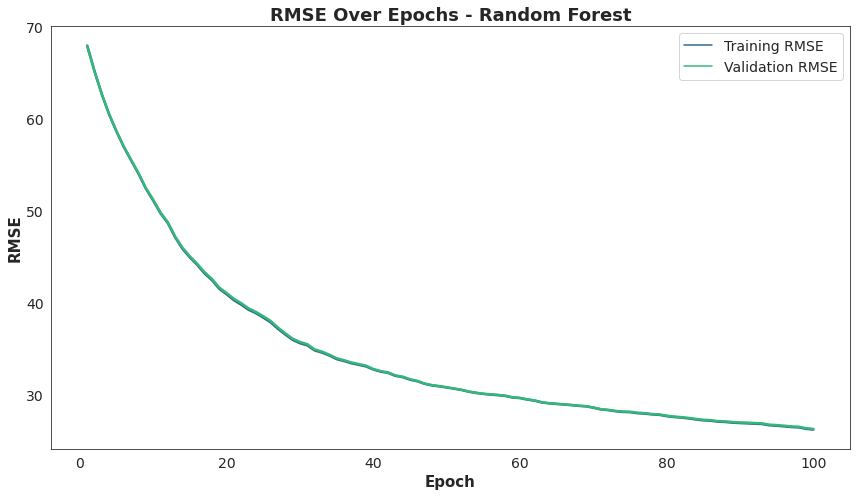

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming combined_data is your dataset and 'SpCond' is the target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gbm.fit(X_train, y_train)

# Collect RMSE over each stage
train_rmse = []
validation_rmse = []
for stage_predictions in gbm.staged_predict(X_train):
    train_rmse.append(np.sqrt(mean_squared_error(y_train, stage_predictions)))

for stage_predictions in gbm.staged_predict(X_val):
    validation_rmse.append(np.sqrt(mean_squared_error(y_val, stage_predictions)))

# Convert the RMSE values to a DataFrame
data = pd.DataFrame({
    'Epoch': np.arange(1, 101),
    'Training RMSE': train_rmse,
    'Validation RMSE': validation_rmse
})

# Data Transformation for Plotting
data_melted = data.melt(
    id_vars=['Epoch'], 
    value_vars=['Training RMSE', 'Validation RMSE'],
    var_name='Dataset', 
    value_name='RMSE'
)

# Palette Configuration
colors = sns.color_palette("viridis", n_colors=2)
palette_dict = {'Training RMSE': colors[0], 'Validation RMSE': colors[1]}

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=data_melted, 
    x='Epoch', 
    y='RMSE', 
    hue='Dataset', 
    palette=palette_dict, 
    linewidth=2.5
)

# Plot Styling and Decorations
plt.title('RMSE Over Epochs - Random Forest', fontsize=18, fontweight='bold')
plt.xlabel('Epoch', fontsize=15, fontweight='bold')
plt.ylabel('RMSE', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Display Plot
plt.tight_layout()
plt.show()

### Decision Trees Algorithm

In [38]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Number of splits
n_splits = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold
fold_num = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train a Decision Tree Regressor
    reg = DecisionTreeRegressor(random_state=42)
    reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = reg.predict(X_test)

    # Calculate and print metrics
    print(f"Fold {fold_num} Results:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("============================")

    fold_num += 1

Fold 1 Results:
R2 Score: 0.9041934423130245
Mean Squared Error: 484.4283745362738
Root Mean Squared Error: 22.009733631652015
Mean Absolute Error: 9.176697192856722
Fold 2 Results:
R2 Score: 0.9051092904363612
Mean Squared Error: 478.4881874687677
Root Mean Squared Error: 21.874372847438796
Mean Absolute Error: 9.215523770360805
Fold 3 Results:
R2 Score: 0.9025869305007548
Mean Squared Error: 497.2540214801385
Root Mean Squared Error: 22.29919329213814
Mean Absolute Error: 9.361225808889968
Fold 4 Results:
R2 Score: 0.9068474638077527
Mean Squared Error: 476.4993196488525
Root Mean Squared Error: 21.82886436919824
Mean Absolute Error: 9.141449970500355
Fold 5 Results:
R2 Score: 0.9029872123824214
Mean Squared Error: 487.81929554458804
Root Mean Squared Error: 22.086631602500823
Mean Absolute Error: 9.20787903891957


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate and print metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9041934423130245
Mean Squared Error: 484.4283745362738
Root Mean Squared Error: 22.009733631652015
Mean Absolute Error: 9.176697192856722


R2 Score: 0.9042
Mean Squared Error: 484.4284
Root Mean Squared Error: 22.0097
Mean Absolute Error: 9.1767
           Feature  Importance
1               pH    0.300128
5  WTemp_to_SpCond    0.274238
4   Turb_to_SpCond    0.128356
2             Turb    0.123404
0               DO    0.092170
3            WTemp    0.081705


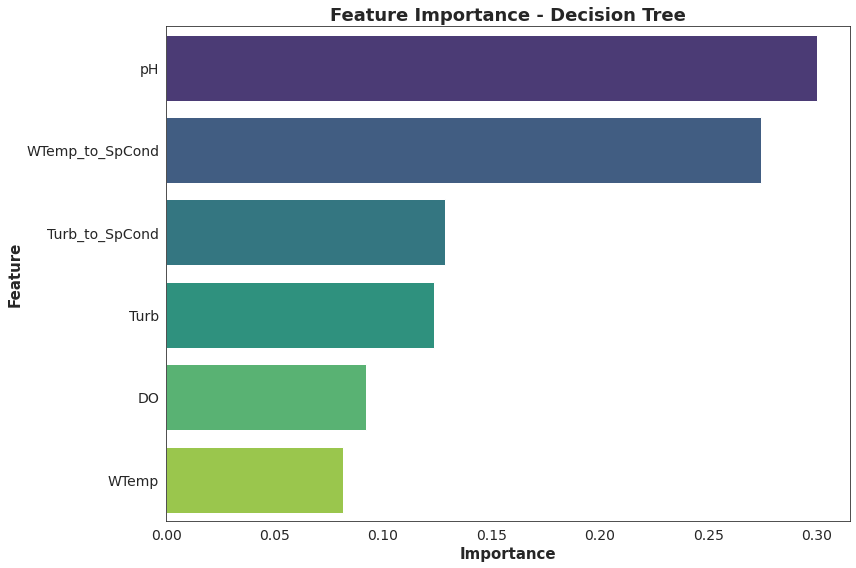

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Separate Features and Target Variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict on Test Set
y_pred = reg.predict(X_test)

# Calculate Metrics
metrics = {
    "R2 Score": r2_score(y_test, y_pred),
    "Mean Squared Error": mean_squared_error(y_test, y_pred),
    "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, y_pred)),
    "Mean Absolute Error": mean_absolute_error(y_test, y_pred)
}

# Display Metrics
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# Extract Feature Importances
feature_importances = reg.feature_importances_

# Convert to DataFrame for Visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort Features by Importance
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

# Plot Feature Importances using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y='Feature', x='Importance', data=features_df, palette='viridis')

# Styling and Decorations
plt.title('Feature Importance - Decision Tree', fontsize=18, fontweight='bold')
plt.xlabel('Importance', fontsize=15, fontweight='bold')
plt.ylabel('Feature', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

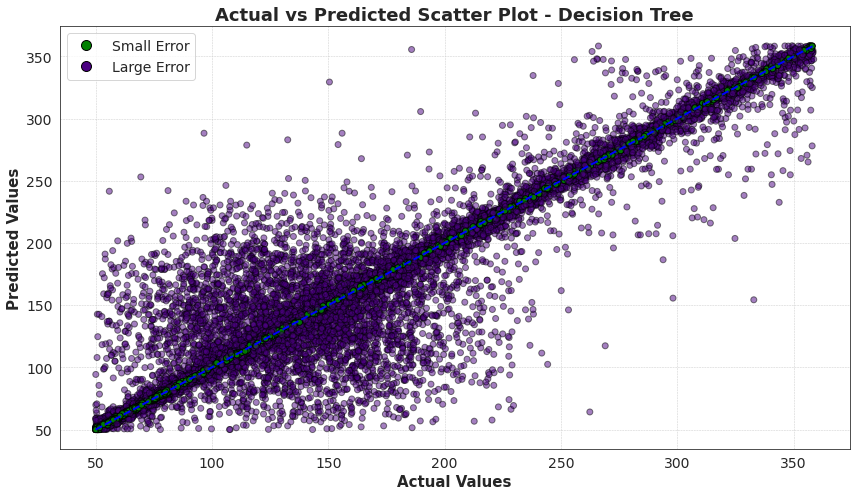

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Separate Features and Target Variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict on Test Set
y_pred = reg.predict(X_test)

# Compute absolute errors
errors = np.abs(y_test - y_pred)

# Define a threshold for small vs. large error
threshold = np.percentile(errors, 50)  # Using the median as a threshold

# Determine colors and alphas based on error magnitude
point_colors = ['green' if e <= threshold else 'indigo' for e in errors]
alphas = [0.9 if e <= threshold else 0.5 for e in errors]

# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Scatter plot of actual vs. predicted values with customized colors and alphas
plt.scatter(y_test, y_pred, c=point_colors, alpha=alphas, edgecolor='black')

# Plot the ideal line (y=x line)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'b--', linewidth=2)

# Additional plot decorations
plt.title('Actual vs Predicted Scatter Plot - Decision Tree', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=15, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend to explain the colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Small Error', markersize=10, markerfacecolor='green', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Large Error', markersize=10, markerfacecolor='indigo', markeredgecolor='black')]
plt.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.show()

### Gradient Boosting Algorithm

In [42]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Number of splits
n_splits = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold
fold_num = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train a Gradient Boosting Regressor
    reg = GradientBoostingRegressor(random_state=42)
    reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = reg.predict(X_test)

    # Calculate and print metrics
    print(f"Fold {fold_num} Results:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("============================")

    fold_num += 1

Fold 1 Results:
R2 Score: 0.8628584874157099
Mean Squared Error: 693.4310304699019
Root Mean Squared Error: 26.333078636382453
Mean Absolute Error: 17.564101840427345
Fold 2 Results:
R2 Score: 0.8649728135969135
Mean Squared Error: 680.8771267295682
Root Mean Squared Error: 26.09362233821836
Mean Absolute Error: 17.437661227920778
Fold 3 Results:
R2 Score: 0.8577962661086898
Mean Squared Error: 725.8921098620484
Root Mean Squared Error: 26.94238500693746
Mean Absolute Error: 17.99374763071204
Fold 4 Results:
R2 Score: 0.8640831095695051
Mean Squared Error: 695.2500540109669
Root Mean Squared Error: 26.367594771062585
Mean Absolute Error: 17.62636408940599
Fold 5 Results:
R2 Score: 0.8626888395394359
Mean Squared Error: 690.4557142541594
Root Mean Squared Error: 26.276524013920856
Mean Absolute Error: 17.78099213599221


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate and print metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8628584874157099
Mean Squared Error: 693.4310304699019
Root Mean Squared Error: 26.333078636382453
Mean Absolute Error: 17.564101840427345


R2 Score: 0.8629
Mean Squared Error: 693.4310
Root Mean Squared Error: 26.3331
Mean Absolute Error: 17.5641
           Feature  Importance
1               pH    0.311235
5  WTemp_to_SpCond    0.272611
0               DO    0.156481
4   Turb_to_SpCond    0.114221
2             Turb    0.100890
3            WTemp    0.044561


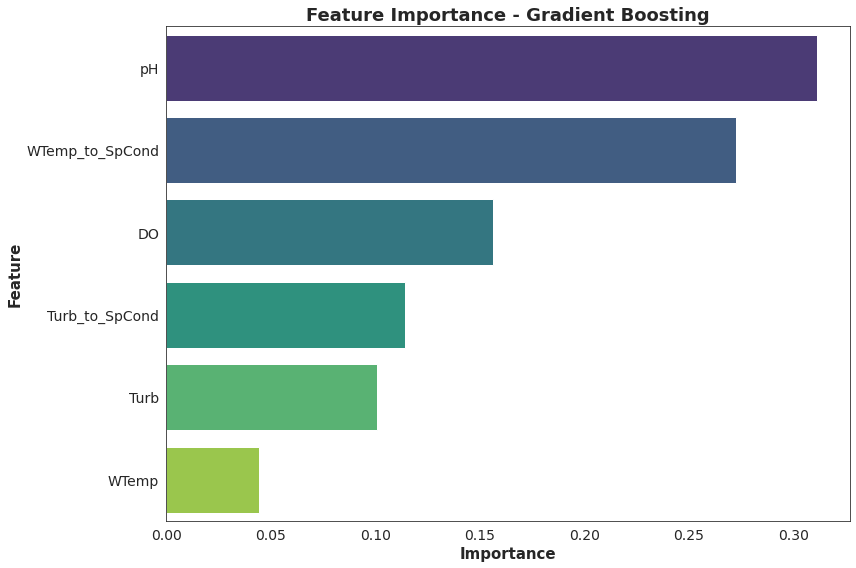

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = combined_data.drop(['SpCond'], axis=1)
y = combined_data['SpCond']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate Metrics
metrics = {
    "R2 Score": r2_score(y_test, y_pred),
    "Mean Squared Error": mean_squared_error(y_test, y_pred),
    "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, y_pred)),
    "Mean Absolute Error": mean_absolute_error(y_test, y_pred)
}

# Display Metrics
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# Extract Feature Importances
feature_importances = reg.feature_importances_

# Convert to DataFrame for Visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort Features by Importance
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

# Plot Feature Importances using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y='Feature', x='Importance', data=features_df, palette='viridis')

# Styling and Decorations
plt.title('Feature Importance - Gradient Boosting', fontsize=18, fontweight='bold')
plt.xlabel('Importance', fontsize=15, fontweight='bold')
plt.ylabel('Feature', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

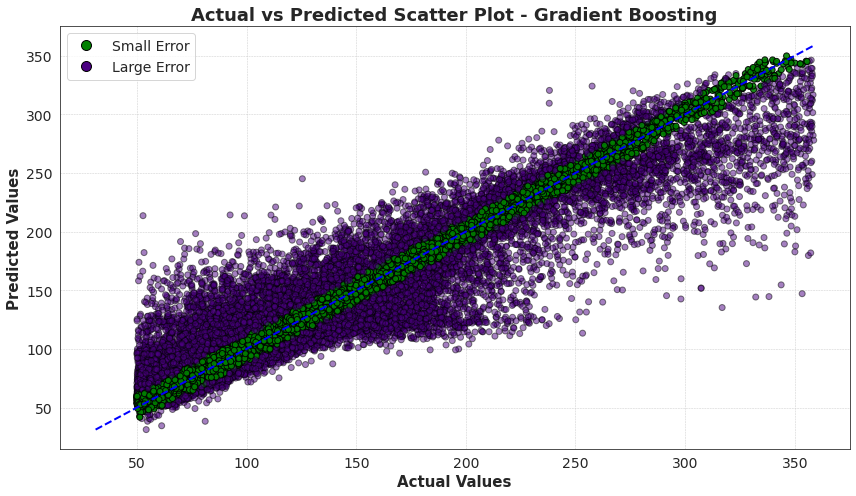

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Compute absolute errors
errors = np.abs(y_test - y_pred)

# Define a threshold for small vs. large error
threshold = np.percentile(errors, 50)  # Using the median as a threshold

# Determine colors and alphas based on error magnitude
point_colors = ['green' if e <= threshold else 'indigo' for e in errors]
alphas = [0.9 if e <= threshold else 0.5 for e in errors]

# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Scatter plot of actual vs. predicted values with customized colors and alphas
plt.scatter(y_test, y_pred, c=point_colors, alpha=alphas, edgecolor='black')

# Plot the ideal line (y=x line)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'b--', linewidth=2)

# Additional plot decorations
plt.title('Actual vs Predicted Scatter Plot - Gradient Boosting', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=15, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=15, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend to explain the colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Small Error', markersize=10, markerfacecolor='green', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Large Error', markersize=10, markerfacecolor='indigo', markeredgecolor='black')]
plt.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.show()